# Initial Data Exploration

## Table of Contents

- [1. Importing and Cleaning Review Data](#1.-Importing-and-Cleaning-Review-Data)
- [2. Exploratory Data Analysis with Statistics](#2.-Exploratory-Data-Analysis-with-Statistics)
- [3. Exploratory Data Analysis with Visuals](#3.-Exploratory-Data-Analysis-with-Visuals)
    - [3.1. Word Clouds of Positive and Negative Reviews](#3.1.-Word-Clouds-of-Positive-and-Negative-Reviews)
    - [3.2. Distribution of Reviews, Ratings, and Words](#3.2.-Distribution-of-Reviews,-Ratings,-and-Words)
- [4. Top 20 Unigrams and Bigrams in Positive Reviews](#4.-Top-20-Unigrams-and-Bigrams-in-Positive-Reviews)
- [5. Top 20 Trigrams, Quadrigrams, and Quintgrams in Positive Reviews](#5.-Top-20-Trigrams,-Quadrigrams,-and-Quintgrams-in-Positive-Reviews)
- [6. Top 20 Unigrams to Quintgrams in Negative Reviews](#6.-Top-20-Unigrams-to-Quintgrams-in-Negative-Reviews)
- [7. Identifying N-Grams with Identical Words](#7.-Identifying-N-Grams-with-Identical-Words)

## 1. Importing and Cleaning Review Data

In [1]:
# Import libraries for word cloud and plotting
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px
import seaborn as sns

# Import libraries for text vectorization and stopword removal
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Import libraries for data manipulation
from collections import Counter
import pandas as pd
import numpy as np
import re

# Suppress all warnings during execution
import warnings
warnings.filterwarnings('ignore')

# Set the maximum column width for displaying DataFrame
pd.options.display.max_colwidth = 1000


# Load the IMDB dataset from a CSV file and display the first 3 rows
imdb = pd.read_csv('Data/IMDB_Dataset.csv')
imdb.head(3)

Ratings  \
0      1.0   
1      1.0   
2      1.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Reviews  \
0  *Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...   
1  I am writing this in hopes that this gets put over the previous review of this "film". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled "Disaster Movie", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being "Twister". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these actually just seem to be taken from trailers.There is nothing clever or witty or re...   
2  Really, I could write a scathing review of this turd sandwich, but instead, I'm just going to be making a few observations and points I've deduced.There's just no point in watching these movies anymore. Does any reader out there remember Scary Movie? Remember how it was original with a few comedic elements to it? There was slapstick, some funny lines, it was a pretty forgettable comedy, but it was worth the price of admission. Well, That was the last time this premise was funny. STOP MAKING THESE MOVIES. PLEASE.I could call for a boycott of these pieces of monkey sh*t, but we all know there's going to be a line up of pre pubescent annoying little buggers, spouting crappy one liners like, "THIS IS SPARTA!" and, "IM RICK JAMES BITCH" so these movies will continue to make some form of monetary gain, considering the production value of this movie looks like it cost about 10 cents to make.Don't see this movie. Don't 

In [2]:
# Customize stop words by adding and removing specific words and print the results
stop_words = stopwords.words('english')
new_stopwords = ["would", "could", "shall", "might"]

stop_words.extend(new_stopwords)
stop_words.remove("not")

stop_words = set(stop_words)
print(stop_words)

{'then', 'what', 'is', 'ourselves', 'against', 'both', 'down', 'more', "hasn't", 'few', 'after', 'i', 'might', 'who', 'your', 'all', 'very', 'between', 'and', 'an', 'to', 'the', 'of', 'herself', 'some', 'from', 'before', 'll', 'aren', "you've", 'same', 'ours', "hadn't", 'it', 'by', 'ma', 'over', 'own', 'can', 's', 'had', 'but', 'other', 'again', 'than', "couldn't", "mightn't", "you'd", 'hasn', 'with', 'whom', 'are', 'you', 'when', 'yours', 'don', 'him', 'or', 'only', 'off', 'itself', 'didn', 'hers', 'about', 'will', 'has', 'me', 'was', "shan't", 'them', 'isn', 'too', 'just', 'my', "you're", "isn't", 'we', 'for', 'out', 'now', 'most', 'these', 'himself', 'they', 'have', 'yourselves', "wouldn't", 'yourself', 'shan', 'any', 'ain', 'how', 'shall', 'no', 're', 't', 'further', 'while', "haven't", 'a', 'mustn', 'where', 'at', 'o', 'such', 'mightn', 'her', 'doing', 'weren', 'as', 'its', "you'll", 'm', 'am', 'could', 'should', 'through', "mustn't", 'themselves', 'during', 'their', "aren't", 'wa

In [3]:
# Remove URLs from text
def remove_urls(text):
    return re.sub(r"http\S+|www\S+", "", text)

# Remove emails from text
def remove_emails(text):
    return re.sub(r"\S+@\S+", "", text)

# Remove special characters from text
def remove_special_chars(text):
    return re.sub(r"\W+", " ", text)

# Reduce repeated word sequences from text
def reduce_repeated_sequences(text):
    text = re.sub(r"\b(\w+)(\s+\1)+\b", r"\1", text)
    return text

# Remove repeated word sequences from text
def remove_repeated_sequences(text):
    target_words = ['blah', 'mario', 'la']
    text = re.sub(r"\b(" + "|".join(target_words) + r")(\s+\1)+\b", "", text)
    return text

# Remove stopwords from text
def remove_stopwords(text):
    filtered_words = []
    for word in text.split():
        normalized_word = word.lower()
        if normalized_word not in stop_words and normalized_word.isalpha():
            filtered_words.append(normalized_word)
    return " ".join(filtered_words)

# Expand contractions in text
def expand_contractions(text):
    contractions_dict = {
        "shouldn't": "should not",
        "weren't": "were not",
        "won't": "will not",
        "mightn't": "might not",
        "couldn't": "could not",
        "can't": "cannot",
        "didn't": "did not",
        "don't": "do not",
        "needn't": "need not",
        "haven't": "have not",
        "hasn't": "has not",
        "'re": " are",
        "'m": " am",
        "'ll": " will",
        "'ve": " have"
    }
    for contraction, expansion in contractions_dict.items():
        text = re.sub(contraction, expansion, text)
    return text
    
# Clean text by applying multiple preprocessing steps
def clean_data(text):
    text = remove_urls(text)
    text = remove_emails(text)
    text = expand_contractions(text)
    text = remove_special_chars(text)
    text = remove_stopwords(text)
    text = remove_repeated_sequences(text)
    text = reduce_repeated_sequences(text)
    text = " ".join(text.split())
    return text


# Apply text cleaning function to 'Reviews' and display the first 3 rows of the dataset
imdb['Reviews_Clean'] = imdb['Reviews'].apply(clean_data)
imdb.head(3)

Ratings  \
0      1.0   
1      1.0   
2      1.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Reviews  \
0  *Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...   
1  I am writing this in hopes that this gets put over the previous review of this "film". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled "Disaster Movie", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being "Twister". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these actually just seem to be taken from trailers.There is nothing clever or witty or re...   
2  Really, I could write a scathing review of this turd sandwich, but instead, I'm just going to be making a few observations and points I've deduced.There's just no point in watching these movies anymore. Does any reader out there remember Scary Movie? Remember how it was original with a few comedic elements to it? There was slapstick, some funny lines, it was a pretty forgettable comedy, but it was worth the price of admission. Well, That was the last time this premise was funny. STOP MAKING THESE MOVIES. PLEASE.I could call for a boycott of these pieces of monkey sh*t, but we all know there's going to be a line up of pre pubescent annoying little buggers, spouting crappy one liners like, "THIS IS SPARTA!" and, "IM RICK JAMES BITCH" so these movies will continue to make some form of monetary gain, considering the production value of this movie looks like it cost about 10 cents to make.Don't see this movie. Don't 

## 2. Exploratory Data Analysis with Statistics

In [4]:
# Check for missing values in the dataset
imdb.isna().sum()

Ratings           0
Reviews           0
Movies           25
Resenhas          0
Reviews_Clean     0
dtype: int64

In [5]:
# Get the count of unique ratings sorted by rating value
imdb['Ratings'].value_counts().sort_index()

Ratings
1.0     15000
2.0     15000
3.0     15000
4.0     15000
5.0     15000
6.0     15000
7.0     15000
8.0     15000
9.0     15000
10.0    15000
Name: count, dtype: int64

In [6]:
# Get descriptive statistics for the 'Ratings' column
imdb['Ratings'].describe()

count    150000.000000
mean          5.500000
std           2.872291
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64

In [7]:
# Get descriptive statistics for the 'Reviews_Clean' column
imdb['Reviews_Clean'].describe()

count                                                                   150000
unique                                                                  149752
top       story soundtrack dialog graphic reasonableness entertainment overall
freq                                                                        10
Name: Reviews_Clean, dtype: object

In [8]:
# Print statistics for unique reviews, movie names, and total ratings
print("Number of unique reviews: %s" % imdb.Reviews_Clean.nunique())
print("Number of unique movie names: %s" % imdb.Movies.nunique())
print("Total number of ratings: %s" % imdb.Ratings.count())

Number of unique reviews: 149752
Number of unique movie names: 14206
Total number of ratings: 150000


## 3. Exploratory Data Analysis with Visuals

### 3.1. Word Clouds of Positive and Negative Reviews

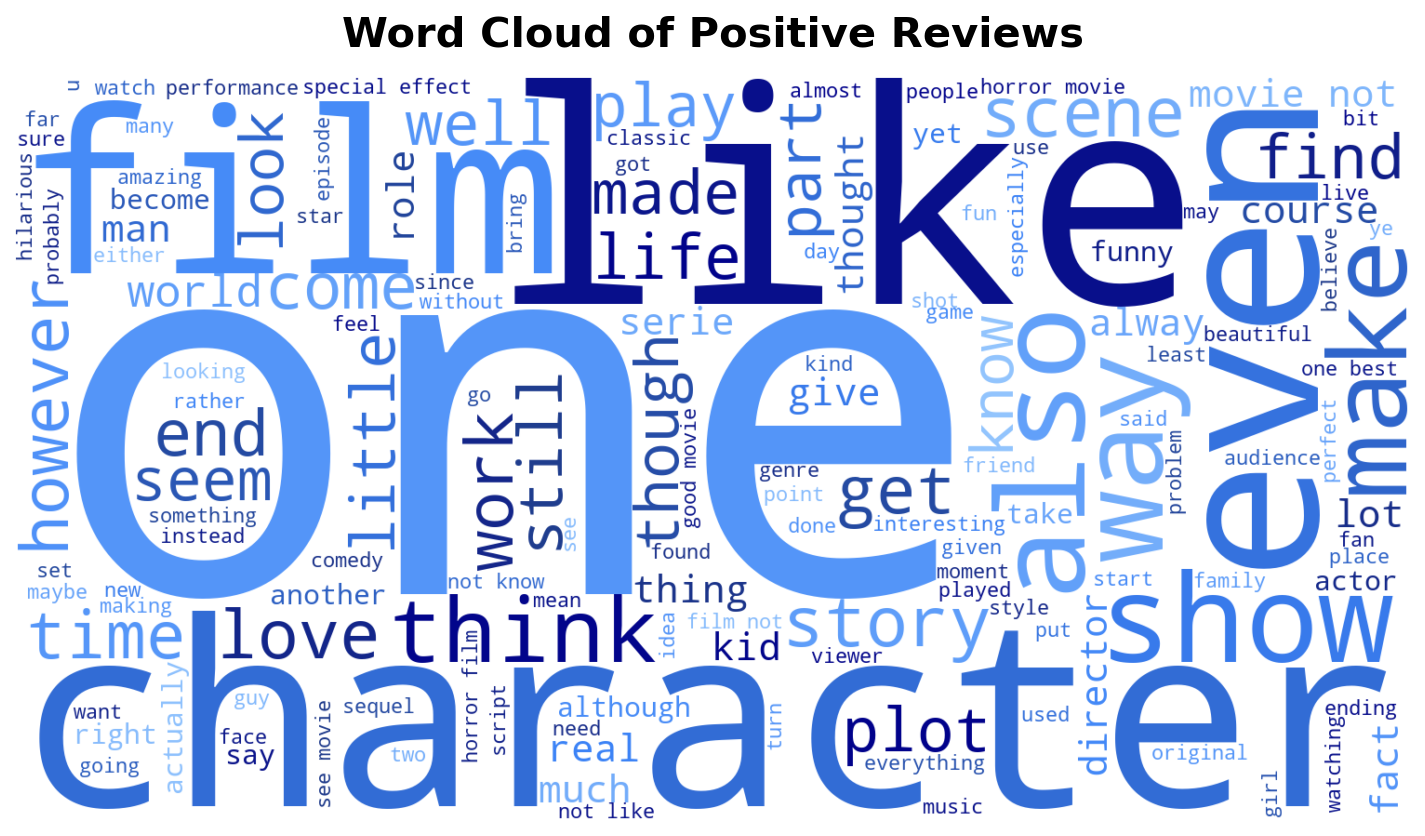

In [9]:
# Prepare combined text for positive and negative reviews based on ratings
positive_reviews = ' '.join(map(str, imdb['Reviews_Clean'][imdb['Ratings'] >= 7]))
negative_reviews = ' '.join(map(str, imdb['Reviews_Clean'][imdb['Ratings'] <= 4]))

# Create a custom blue color map for the word clouds
colors = ["#00008B", "#1E3A8A", "#3B82F6", "#93C5FD"]
cmap = LinearSegmentedColormap.from_list("custom_blues", colors)


# Create and display a word cloud for positive reviews
positive_wordcloud = WordCloud(width=1500, height=800, min_font_size=18, max_words=150, margin=3,
                               background_color='white', colormap=cmap, stopwords=stop_words).generate(positive_reviews)

plt.figure(figsize=(12, 8), dpi=150)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Positive Reviews', weight='bold', size=20, pad=15)
plt.axis('off')
plt.show()

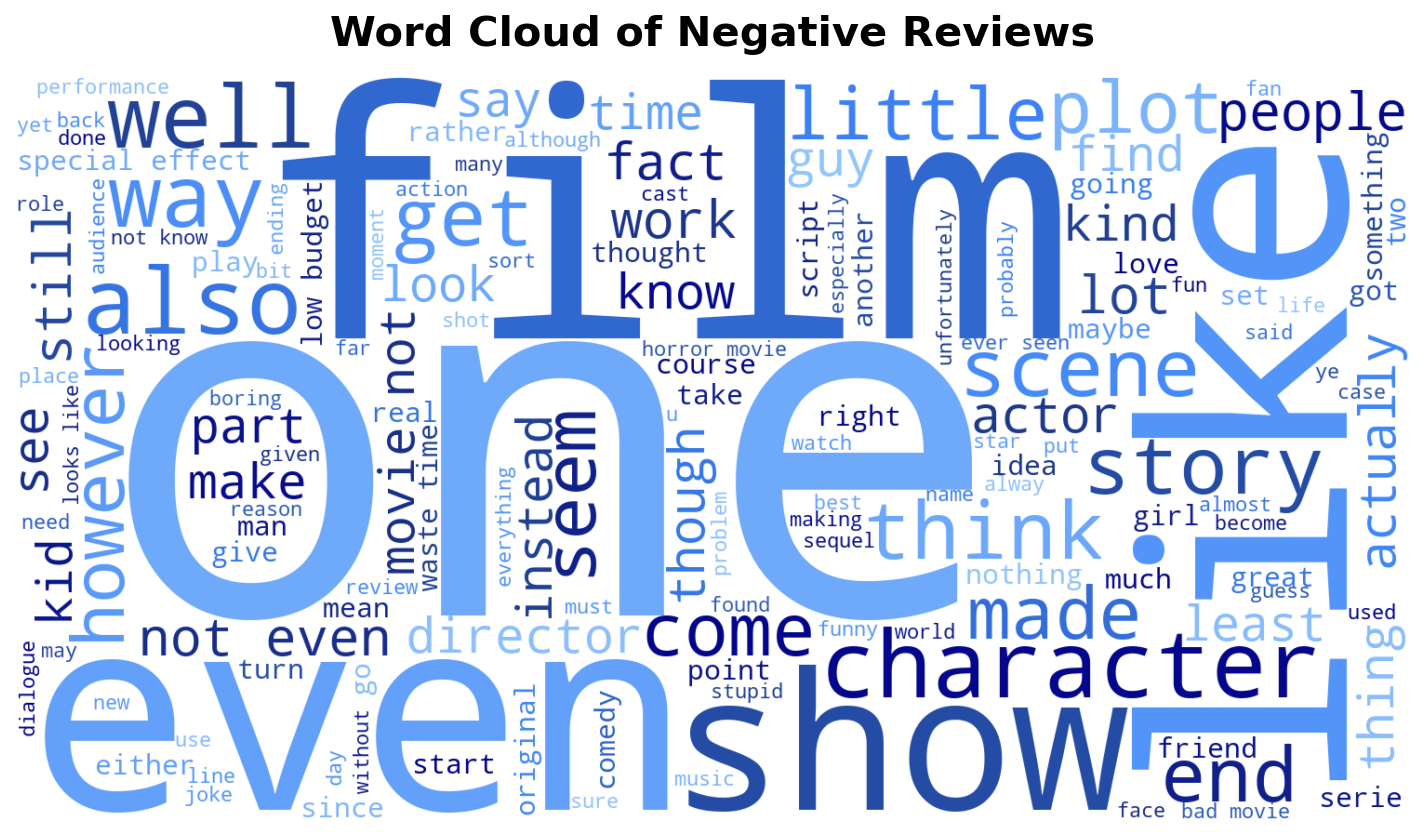

In [10]:
# Create and display a word cloud for negative reviews
negative_wordcloud = WordCloud(width=1500, height=800, min_font_size=18, max_words=150, margin=3,
                               background_color='white', colormap=cmap, stopwords=stop_words).generate(negative_reviews)

plt.figure(figsize=(12, 8), dpi=150)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Negative Reviews', weight='bold', size=20, pad=15)
plt.axis('off')
plt.show()

### 3.2. Distribution of Reviews, Ratings, and Words

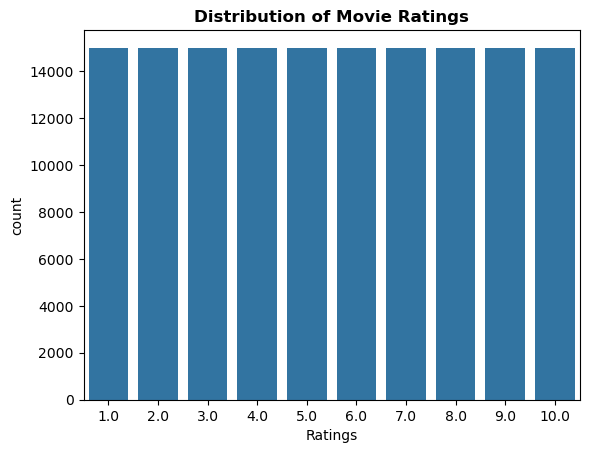

In [11]:
# Plot the distribution of movie ratings
sns.countplot(x=imdb['Ratings'])
plt.title("Distribution of Movie Ratings", fontweight='bold')
plt.show()

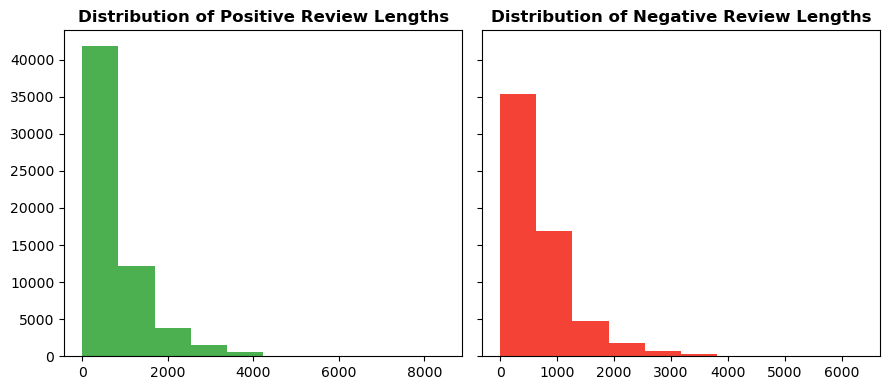

In [12]:
# Plot histograms of lengths for positive and negative reviews side by side
fig, (pos_ax, neg_ax) = plt.subplots(1, 2, sharey=True, figsize=[9, 4])

pos_review_lengths = imdb[imdb['Ratings'] >= 7]['Reviews_Clean'].str.len()
pos_ax.hist(pos_review_lengths, color='#4CAF50')
pos_ax.set_title('Distribution of Positive Review Lengths', weight='bold')

neg_review_lengths = imdb[imdb['Ratings'] <= 4]['Reviews_Clean'].str.len()
neg_ax.hist(neg_review_lengths, color='#F44336')
neg_ax.set_title('Distribution of Negative Review Lengths', weight='bold')

plt.tight_layout()
plt.show()

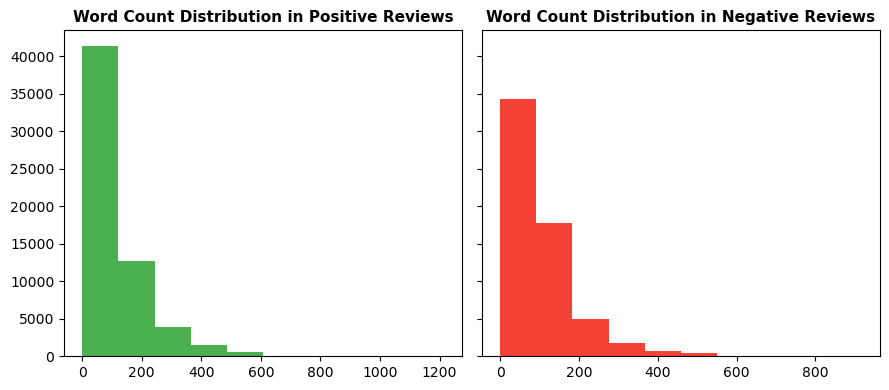

In [13]:
# Plot histograms of word counts for positive and negative reviews side by side
fig, (pos_ax, neg_ax) = plt.subplots(1, 2, sharey=True, figsize=[9, 4])

pos_reviews_split = imdb[imdb['Ratings'] >= 7]['Reviews_Clean'].str.split()
neg_reviews_split = imdb[imdb['Ratings'] <= 4]['Reviews_Clean'].str.split()

pos_word_count = pos_reviews_split.map(lambda review: len(review))
pos_ax.hist(pos_word_count, color='#4CAF50')
pos_ax.set_title('Word Count Distribution in Positive Reviews', weight='bold', size=11)

neg_word_count = neg_reviews_split.map(lambda review: len(review))
neg_ax.hist(neg_word_count, color='#F44336')
neg_ax.set_title('Word Count Distribution in Negative Reviews', weight='bold', size=11)

plt.tight_layout()
plt.show()

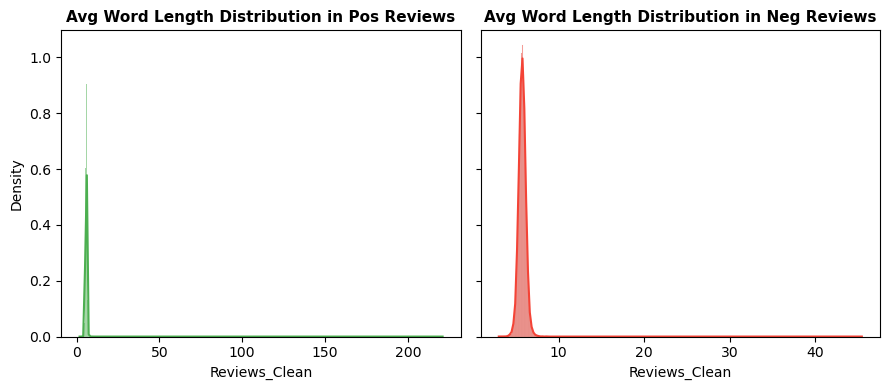

In [14]:
# Plot the distribution of average word lengths in positive and negative reviews
fig, (pos_ax, neg_ax) = plt.subplots(1, 2, sharey=True, figsize=[9, 4])

pos_word_lengths = pos_reviews_split.apply(lambda review: [len(word) for word in review])
avg_pos_word_len = pos_word_lengths.map(lambda word_lengths: np.mean(word_lengths))
          
sns.histplot(avg_pos_word_len, stat="density", color='#4CAF50', kde=True, ax=pos_ax)
pos_ax.set_title('Avg Word Length Distribution in Pos Reviews', weight='bold', size=11)

neg_word_lengths = neg_reviews_split.apply(lambda review: [len(word) for word in review])
avg_neg_word_len = neg_word_lengths.map(lambda word_lengths: np.mean(word_lengths))

sns.histplot(avg_neg_word_len, stat="density", color='#F44336', kde=True, ax=neg_ax)
neg_ax.set_title('Avg Word Length Distribution in Neg Reviews', weight='bold', size=11)

plt.tight_layout()
plt.show()

In [15]:
# Display the maximum average word length for positive and negative reviews
display(avg_pos_word_len[avg_pos_word_len == avg_pos_word_len.max()])
display(avg_neg_word_len[avg_neg_word_len == avg_neg_word_len.max()])

134934    221.0
Name: Reviews_Clean, dtype: float64

12406    45.428571
Name: Reviews_Clean, dtype: float64

In [16]:
# Display the review at index 134934
imdb['Reviews'].loc[134934]

'JaodiwdjoaiwoJaodiwdjoaiwoJaodiwdjoaiwoJaodiwdjoaiwoJaodiwdjoaiwoJaodiwdjoaiwoJaodiwdjoaiwoJaodiwdjoaiwoJaodiwdjoaiwoJaodiwdjoaiwoJaodiwdjoaiwoJaodiwdjoaiwoJaodiwdjoaiwoJaodiwdjoaiwoJaodiwdjoaiwoJaodiwdjoaiwoJaodiwdjoaiwo'

In [17]:
# Display the review at index 12406
imdb['Reviews'].loc[12406]

'This was far beyond the worst horror film ever.zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz'

## 4. Top 20 Unigrams and Bigrams in Positive Reviews

In [18]:
# Extract top n-grams from a corpus based on their frequency
def get_top_ngrams(corpus, max_ngrams, n):
    vect = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    ngram_matrix = vect.transform(corpus)
    
    ngram_freqs = ngram_matrix.sum(axis=0)
    ngram_freqs = [(ngram, ngram_freqs[0, idx]) for ngram, idx in vect.vocabulary_.items()]
    
    sorted_ngram_freqs = sorted(ngram_freqs, key=lambda x:x[1], reverse=True)
    return sorted_ngram_freqs[:max_ngrams]


# Get top 20 unigrams in positive reviews and plot the results
top_pos_unigrams = get_top_ngrams(imdb.loc[imdb['Ratings'] >= 7, 'Reviews_Clean'], 20, 1)
top_pos_unigrams = dict(top_pos_unigrams)

top_unigrams_df = pd.DataFrame({"Top Unigrams": list(top_pos_unigrams.keys()),
                                "Count": list(top_pos_unigrams.values())})

fig = px.bar(top_unigrams_df, x="Count", y="Top Unigrams", width=700, height=700,
             title='Top 20 Most Common Unigrams in Positive Reviews', orientation='h', color='Top Unigrams')
fig.show()

In [19]:
# Get top 20 bigrams in positive reviews and plot the results
top_pos_bigrams = get_top_ngrams(imdb.loc[imdb['Ratings'] >= 7, 'Reviews_Clean'], 20, 2)
top_pos_bigrams = dict(top_pos_bigrams)

top_bigrams_df = pd.DataFrame({"Top Bigrams": list(top_pos_bigrams.keys()),
                               "Count": list(top_pos_bigrams.values())})

fig = px.bar(top_bigrams_df, x="Count", y="Top Bigrams", width=700, height=700,
             title='Top 20 Most Common Bigrams in Positive Reviews', orientation='h', color='Top Bigrams')
fig.show()

In [20]:
# Display first 3 positive reviews with specific negative phrases
imdb[["Reviews", "Ratings", "Movies"]][(imdb['Ratings'] >= 7) &
                                       (imdb['Reviews_Clean'].str.contains("not know|not like|not big fan"))].head(3)

Reviews  \
90015  To be honest I didn't watch this movie initially because of bad reviews by most of the professional reviewers. But yesterday I got its DVD and thought why not watch it at least for 15 minutes. And I was really surprised. I enjoyed the fist 15 minutes and decided to watch the entire movie and to be honest I had a blast. It is not a bad movie as other reviews suggest. I don't know why those reviewers didn't like the movie. Anyhow lets talk about story. The story is fine and screenplay is good. The dialogues and situations are okay. I laughed at almost every gag. Saif in the role of mental guy was superb. He stole the show with that character. Ram kapoor in all 3 roles was good. I felt Ritesh didn't get those excellent lines to deliver that he got in movies like Masti and Dhamaal. The 3 girls have small roles and have nothing much to do. I wonder what made a serious actor like Bipasha do this type of movie. Anyhow I feel Sajid Khan did a good job. And people should watch this movie th...   
90026  Well, what can I say. I'm an IMDb junkie, so one day when I was checking out the Bottom 100 list for some laughs, I came across Future War. After reading the line  of a user comment, 'forced perspective dinosaurs', I embarked on a 20-minute laughing attack and had to find out more. So I went out and bought it somewhere for like 3 bucks, and pumped it into the DVD player, and prepared myself for the worst. I don't know where to begin. I really don't.The opening credits-roll is truly scary. Five minutes worth of poorly-timed cuts between the cast of characters and tech team interspersed with recycled (and bad, might I add) space cruiser footage. I fast-forwarded through them after a minute - and this was during the first time seeing the film!Scenes that go nowhere - like when the Runaway (Bernhardt) walks into a room and says, "They stay near water", referring to the dino-trackers,  and the scene cuts frighteningly too soon. At times, the video quality is shattered by dark shadows th...   
90042  Way of the Vampire begins around the turn of the 20th Century in England. Abraham Van Helsing (Rhett Giles), who is immortal here, has assembled a "gang" of vampire slayers (no, they're not a Scooby gang like Buffy's). In the first few minutes, the gang is slaughtered, but Van Helsing decapitates Dracula. Dracula's "gang" is left in temporary chaos. The "Prince" who will replace him, Sebastien (Andreas Beckett), was mistaken by Van Helsing for an eligible member of his gang. Unfortunately, he left Sebastien with his wife, who Sebastien turned into a vampire while Van Helsing was out earning the bacon.The opening credits roll, and we are propelled into "The Present". Van Helsing has moved to Los Angeles (to try to jumpstart a film career?) and naturally so has Sebastien and his current gang. We can all guess the kind of chaos that will ensue.First off, whoever did the sound mix for this film--for the DVD in general, for that matter--should to be looking for another job, pronto. Even...   

       Ratings              Movies  
90015      7.0          Humshakals  
90026      7.0          Future War  
90042      7.0  Way of the Vampire

In [21]:
# Display first 3 positive reviews containing 'bad review'
imdb[["Reviews", "Ratings", "Movies"]][(imdb['Ratings'] >= 7) &
                                       (imdb['Reviews_Clean'].str.contains("bad review"))].head(3)

Reviews  \
90015  To be honest I didn't watch this movie initially because of bad reviews by most of the professional reviewers. But yesterday I got its DVD and thought why not watch it at least for 15 minutes. And I was really surprised. I enjoyed the fist 15 minutes and decided to watch the entire movie and to be honest I had a blast. It is not a bad movie as other reviews suggest. I don't know why those reviewers didn't like the movie. Anyhow lets talk about story. The story is fine and screenplay is good. The dialogues and situations are okay. I laughed at almost every gag. Saif in the role of mental guy was superb. He stole the show with that character. Ram kapoor in all 3 roles was good. I felt Ritesh didn't get those excellent lines to deliver that he got in movies like Masti and Dhamaal. The 3 girls have small roles and have nothing much to do. I wonder what made a serious actor like Bipasha do this type of movie. Anyhow I feel Sajid Khan did a good job. And people should watch this movie th...   
90019  Because I had a small part in the movie it wouldn't be ethical for me to write a review. But I want to counter the very negative, almost angry review posted. (Incidentally, the big budget movie "San Andreas" didn't exactly get great reviews by the professional reviewers). I think Rotten Tomatoes showed a 4.5/10. I'm not allowed to post someone else's review for copyright reasons, but I urge the reader, if thinking of buying or downloading this movie to read the review from YIFY subtitles dot com I think it's permissible to quote a couple of lines though: "...The elderly couple in the hotel were adorable and their story touching....." and "...The acting by everyone involved was excellent... I give it 8 stars because I want to balance out all the bad reviews this one will get because its Asylum and called Andreas Quake...." But to continue, I feel that had I not been in the movie (as Mr. Lowenstein), and was seeing it cold, I'd be surprised that it was not being shown on the big scre...   
90057  While wrong-turn backwoods horrors are a-dime-a-dozen, this film explores something more than mere murder and mayhem. The creepy grand matriarch of a motley band of misfits has some metaphysical mojo and a yin for your yang, making a powerplay for your very soul. You float in a wooded bardo, the naked expanse between an unrelenting sun shining into every hidden corner of your psyche with incisive intensity and a dark moon which threatens to swallow you whole. In three days, you are to be sacrificed, but first your very being will be pared down using the sharp edge of your own fears and desires, layer by layer, to your innermost core. Gooooood times.The film uses a slow, smoldering burn to build the existential horror of the protagonists' predicament, with flurried sights and booming, dissonant sounds a la Lars von Trier's "Antichrist." While certainly not as masterful as von Trier, the film is an encouraging and refreshing feature debut. Given the use of the anglicized version of C...   

       Ratings             Movies  
90015      7.0         Humshakals  
90019      7.0  San Andreas Quake  
90057      7.0         The Taking

## 5. Top 20 Trigrams, Quadrigrams, and Quintgrams in Positive Reviews

In [22]:
# Get top 20 trigrams in positive reviews and plot the results
top_pos_trigrams = get_top_ngrams(imdb.loc[imdb['Ratings'] >= 7, 'Reviews_Clean'], 20, 3)
top_pos_trigrams = dict(top_pos_trigrams)

top_trigrams_df = pd.DataFrame({"Top Trigrams": list(top_pos_trigrams.keys()),
                                "Count": list(top_pos_trigrams.values())})

fig = px.bar(top_trigrams_df, x="Count", y="Top Trigrams", width=700, height=700,
             title='Top 20 Most Common Trigrams in Positive Reviews', orientation='h', color='Top Trigrams')
fig.show()

In [23]:
# Get top 20 quadrigrams in positive reviews and plot the results
top_pos_quadrigrams = get_top_ngrams(imdb.loc[imdb['Ratings'] >= 7, 'Reviews_Clean'], 20, 4)
top_pos_quadrigrams = dict(top_pos_quadrigrams)

top_quadrigrams_df = pd.DataFrame({"Top Quadrigrams": list(top_pos_quadrigrams.keys()),
                                   "Count": list(top_pos_quadrigrams.values())})

fig = px.bar(top_quadrigrams_df, x="Count", y="Top Quadrigrams", width=700, height=700,
             title='Top 20 Most Common Quadrigrams in Positive Reviews', orientation='h', color='Top Quadrigrams')
fig.show()

In [24]:
# Get top 20 quintgrams in positive reviews and plot the results
top_pos_quintgrams = get_top_ngrams(imdb.loc[imdb['Ratings'] >= 7, 'Reviews_Clean'], 20, 5)
top_pos_quintgrams = dict(top_pos_quintgrams)

top_quintgrams_df = pd.DataFrame({"Top Quintgrams": list(top_pos_quintgrams.keys()),
                                  "Count": list(top_pos_quintgrams.values())})

fig = px.bar(top_quintgrams_df, x="Count", y="Top Quintgrams", width=700, height=700,
             title='Top 20 Most Common Quintgrams in Positive Reviews', orientation='h', color='Top Quintgrams')
fig.show()

In [25]:
# Display first 3 positive reviews with repetitive words
imdb[["Reviews", "Ratings", "Movies"]][(imdb['Ratings'] >= 7) &
                                       (imdb['Reviews_Clean'].str.contains("la la la|blah blah blah|mario mario mario"))].head(3)

Empty DataFrame
Columns: [Reviews, Ratings, Movies]
Index: []

## 6. Top 20 Unigrams to Quintgrams in Negative Reviews

In [26]:
# Get top 20 unigrams in negative reviews and plot the results
top_neg_unigrams = get_top_ngrams(imdb.loc[imdb['Ratings'] <= 4, 'Reviews_Clean'], 20, 1)
top_neg_unigrams = dict(top_neg_unigrams)

top_unigrams_df = pd.DataFrame({"Top Unigrams": list(top_neg_unigrams.keys()),
                                "Count": list(top_neg_unigrams.values())})

fig = px.bar(top_unigrams_df, x="Count", y="Top Unigrams", width=700, height=700,
             title='Top 20 Most Common Unigrams in Negative Reviews', orientation='h', color='Top Unigrams')
fig.show()

In [27]:
# Get top 20 bigrams in negative reviews and plot the results
top_neg_bigrams = get_top_ngrams(imdb.loc[imdb['Ratings'] <= 4, 'Reviews_Clean'], 20, 2)
top_neg_bigrams = dict(top_neg_bigrams)

top_bigrams_df = pd.DataFrame({"Top Bigrams": list(top_neg_bigrams.keys()),
                               "Count": list(top_neg_bigrams.values())})

fig = px.bar(top_bigrams_df, x="Count", y="Top Bigrams", width=700, height=700,
             title='Top 20 Most Common Bigrams in Negative Reviews', orientation='h', color='Top Bigrams')
fig.show()

In [28]:
# Get top 20 trigrams in negative reviews and plot the results
top_neg_trigrams = get_top_ngrams(imdb.loc[imdb['Ratings'] <= 4, 'Reviews_Clean'], 20, 3)
top_neg_trigrams = dict(top_neg_trigrams)

top_trigrams_df = pd.DataFrame({"Top Trigrams": list(top_neg_trigrams.keys()),
                                "Count": list(top_neg_trigrams.values())})

fig = px.bar(top_trigrams_df, x="Count", y="Top Trigrams", width=700, height=700,
             title='Top 20 Most Common Trigrams in Negative Reviews', orientation='h', color='Top Trigrams')
fig.show()

In [29]:
# Get top 20 quadrigrams in negative reviews and plot the results
top_neg_quadrigrams = get_top_ngrams(imdb.loc[imdb['Ratings'] <= 4, 'Reviews_Clean'], 20, 4)
top_neg_quadrigrams = dict(top_neg_quadrigrams)

top_quadrigrams_df = pd.DataFrame({"Top Quadrigrams": list(top_neg_quadrigrams.keys()),
                                   "Count": list(top_neg_quadrigrams.values())})

fig = px.bar(top_quadrigrams_df, x="Count", y="Top Quadrigrams", width=700, height=700,
             title='Top 20 Most Common Quadrigrams in Negative Reviews', orientation='h', color='Top Quadrigrams')
fig.show()

In [30]:
# Get top 20 quintgrams in negative reviews and plot the results
top_neg_quintgrams = get_top_ngrams(imdb.loc[imdb['Ratings'] <= 4, 'Reviews_Clean'], 20, 5)
top_neg_quintgrams = dict(top_neg_quintgrams)

top_quintgrams_df = pd.DataFrame({"Top Quintgrams": list(top_neg_quintgrams.keys()),
                                  "Count": list(top_neg_quintgrams.values())})

fig = px.bar(top_quintgrams_df, x="Count", y="Top Quintgrams", width=700, height=700,
             title='Top 20 Most Common Quintgrams in Negative Reviews', orientation='h', color='Top Quintgrams')
fig.show()

In [31]:
# Display first 3 negative reviews with specific positive words
imdb[["Reviews", "Ratings", "Movies"]][(imdb['Ratings'] <= 4) &
                                       (imdb['Reviews_Clean'].str.contains("good|great"))].head(3)

Reviews  \
3  If you saw the other previous spoof movies by these two horrible gentlemen, then you should know that this already will be bad. I'll tell you the truth, if you want to watch it as a brainless person (ironically meant for the stereotypical teenagers, which I am not) then you will laugh at it a bit. But if you judge it, even a little, the movie automatically fails. Why? Never ask that when it comes to these two men.Remember the good old Hollywood days whenever making a movie was about showing people a type of art, and also a story that kept you on the edge of your seat? Well whenever word hit that making films earned you loads of cash, then all these greedy people came in the picture and its quite pathetic. These two are no exception. We still have movie artists (most notably the genius that is Christopher Nolan). But these two guys just...well I've been writing so big words, let me put it in simple terms for these guys...These guys suck, they are not artists, but instead money cravi...   
6  I was given a free ticket to this film; so I can't complain that I was ripped off (except in that some 90 minutes of my life were irretrievably stolen from me). These sort of movies (Date Movie, Epic Movie, Meet the Spartans) haven't been funny for some time now but "Disaster Movie" has reached a new low. There wasn't one real laugh anywhere in the film, and most of the alleged "jokes" were actually painful. (There was a considerable amount of childish, mean-spirited stuff in the form of racist, sexist, and especially homophobic, garbage present, along with ample helpings of juvenile gross-outs.) None of the actors were even bothering to put up any pretense of acting. There is nothing hip, clever, or even mildly intelligent going on here. The entire film is from beginning to end crass, vulgar, irrational, and utterly humorless in any human sense. I know that in the past these sort of trash has made enough money to keep Seltzer et al., grinding them out but "Disaster Movie" may just...   
7                                                                                                                                                                                                                                                                                 OK, so "Disastrous" isn't an imaginative barb for this movie, but then there's not a shred of wit to the movie, so....I saw this movie for free. A friend who said he "pissed his pants" at the trailer had free passes. I think he's incontinent.A spoof of disaster movies might have been fun. This is not it. A couple disaster movies get referenced, not really spoofed. Instead, the "spoofing" is of recent movies of all genres, and of aspects of current pop-culture. Then again, how current is women's wrestling or the "Head On" commercials?If there's anything about it that's good, there's the 70 minute or so running time (where did they get 90 minutes?) and Nicole Parker seems like she might be good, if she had good material.   

   Ratings          Movies  
3      1.0  Disaster Movie  
6      1.0  Disaster Movie  
7      1.0  Disaster Movie

In [32]:
# Display first 3 negative reviews containing 'saturday night friday' or 'not worst movie ever'
imdb[["Reviews", "Ratings", "Movies"]][(imdb['Ratings'] <= 4) &
                                       (imdb['Reviews_Clean'].str.contains("saturday night friday|not worst movie ever"))].head(3)

Reviews  \
85                                                                                                                                     After seeing this movie I ran through the house screaming at the top of my lungs for several hours pausing occasionally only to bang my head repeatedly on the floor.  And that was the MST3K version!!  Imagine seeing this movie pure and undiluted!  It's too horrible to conceive!Seriously, this movie is not only the worst movie I've ever seen; it's the worst movie I can imagine being made!  How could any be worse!  Could Ed Wood make such a movie?  Arch Hall Sr.?  Ray Dennis Steckler?  Phil Tucker? I don't think so.  None can approach Hal P. Warren, sometime fertilizer salesman and would-be auteur, for producing total cinematic crap!Now excuse me, I must go wash up.  Just thinking of this movie makes me feel filthy all over...   
1034  A 1 is way to much credit for this movie! After the first 16 seconds, the best way for this movie to possibly have ended was for each character to simultaneous kill themselves... at least then it would have been over! By far the worst movie of all time, makes Killjoy look like a masterpiece. The only acceptable argument for this not being the worst movie ever is that it's not a movie... just a random grouping of totally unrelated scenes that make no since on there own. Not to mention that every scene is the most annoying scene you'll ever see. Every minute that you watch this movie, you keep telling yourself, "There's no way this could possibly get any worse"... and then it does... every time. The people responsible for this movie should be required by law to never make another movie, under penalty of death... it would make the world a better place ;)   
1521                                                                                                                                                                                                                                                                                                                                                                                                                                                                      I decided to rope a friend into watching this crap with me. They haven't talked to me since..."Alice In Murderland" is without a doubt one of if not the worst movie I've ever seen. Not a single thing about this project could be considered "good" or even competent. I am hesitant to give this a 1, as the number 1 is a positive integer. This film is deserving of a negative ranking. IMDB needs a 0 rating option.   

      Ratings                    Movies  
85        1.0  Manos: The Hands of Fate  
1034      1.0                    Ax 'Em  
1521      1.0       Alice in Murderland

## 7. Identifying N-Grams with Identical Words

In [33]:
# Check if all words in an n-gram are identical
def is_uniform_ngram(ngram):
    words = ngram.split()
    return len(set(words)) == 1


# Get top 1000 bigrams from the cleaned reviews and display the results
top_bigrams = get_top_ngrams(imdb['Reviews_Clean'], 1000, 2)
top_bigrams = dict(top_bigrams)
top_bigrams

{'movie not': 12683,
 'special effects': 10452,
 'low budget': 8850,
 'not even': 8509,
 'not know': 8438,
 'film not': 7318,
 'sci fi': 6519,
 'not really': 6460,
 'not bad': 6135,
 'not like': 6093,
 'even though': 5910,
 'good movie': 5546,
 'ever seen': 5522,
 'horror movie': 5413,
 'much better': 5400,
 'not good': 5334,
 'not think': 5223,
 'not much': 5116,
 'not get': 5030,
 'watch movie': 4920,
 'see movie': 4819,
 'looks like': 4641,
 'pretty much': 4600,
 'year old': 4599,
 'one best': 4564,
 'pretty good': 4508,
 'waste time': 4493,
 'horror film': 4099,
 'look like': 3839,
 'really good': 3833,
 'movie really': 3820,
 'bad movie': 3801,
 'well done': 3781,
 'first film': 3745,
 'movie like': 3695,
 'really not': 3674,
 'first time': 3598,
 'not see': 3595,
 'high school': 3584,
 'not seen': 3510,
 'story line': 3437,
 'first movie': 3399,
 'watching movie': 3384,
 'movie ever': 3324,
 'horror movies': 3324,
 'movie good': 3314,
 'not want': 3275,
 'feel like': 3211,
 'go s

In [34]:
# Identify bigrams with identical words from the top bigrams
uniform_bigrams = [bigram for bigram in top_bigrams if is_uniform_ngram(bigram)]
uniform_bigrams

[]

In [35]:
# Get top 1000 trigrams from the cleaned reviews and identify those with identical words
top_trigrams = get_top_ngrams(imdb['Reviews_Clean'], 1000, 3)
top_trigrams = dict(top_trigrams)

uniform_trigrams = [trigram for trigram in top_trigrams if is_uniform_ngram(trigram)]
uniform_trigrams

[]

In [36]:
# Get top 1000 quadrigrams from the cleaned reviews and identify those with identical words
top_quadrigrams = get_top_ngrams(imdb['Reviews_Clean'], 1000, 4)
top_quadrigrams = dict(top_quadrigrams)

uniform_quadrigrams = [quadrigram for quadrigram in top_quadrigrams if is_uniform_ngram(quadrigram)]
uniform_quadrigrams

[]

In [37]:
# Get top 1000 quintgrams from the cleaned reviews and identify those with identical words
top_quintgrams = get_top_ngrams(imdb['Reviews_Clean'], 1000, 5)
top_quintgrams = dict(top_quintgrams)

uniform_quintgrams = [quintgram for quintgram in top_quintgrams if is_uniform_ngram(quintgram)]
uniform_quintgrams

[]

In [38]:
# Display the review where 'Reviews_Clean' contains "trivialboring"
display(imdb[["Reviews", "Movies"]][imdb['Reviews_Clean'].str.contains("trivialboring")].head())
display(imdb[["Reviews_Clean", "Movies"]][imdb['Reviews_Clean'].str.contains("trivialboring")].head())

Reviews  \
8615  I had to watch this movie for professional reasons and can only say it's a complete waste of time. When running, Baldwin looks like an ape, Characters are dull, same story has been told 1000 times better in other movies. I think everything has been now said about this film, but IMDb requires me to write 10 lines. So:Boring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivialBoring and trivial   

      Movies  
8615  Target

Reviews_Clean  \
8615  watch movie professional reasons say complete waste time running baldwin looks like ape characters dull story told times better movies think everything said film imdb requires write lines boring trivialboring trivial   

      Movies  
8615  Target